In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files

from datetime import datetime, timedelta, date

from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


In [2]:
uploaded = files.upload()
df = pd.read_csv('Sample - Superstore.csv', encoding= 'latin1')
df.head(10)

Saving Sample - Superstore.csv to Sample - Superstore.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
print(df['Order Date'].agg(['min', 'max']))

min   2014-01-03
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]


In [7]:
dfcat = df.groupby(['Order Date', 'Category'])['Sales'].sum().reset_index()

In [8]:
dfcat.head(3)

,Order Date,Category,Sales
0,2014-01-03,Office Supplies,16.448
1,2014-01-04,Office Supplies,288.060
2,2014-01-05,Office Supplies,19.536


In [9]:
df_cat = dfcat['Category'].value_counts()
df_cat.head(20)

,count
Category,
Office Supplies,1148
Furniture,889
Technology,824


In [10]:
df_os = dfcat[dfcat['Category'] == 'Office Supplies']
df_os.head(5)

,Order Date,Category,Sales
0,2014-01-03,Office Supplies,16.448
1,2014-01-04,Office Supplies,288.060
2,2014-01-05,Office Supplies,19.536
4,2014-01-06,Office Supplies,685.340
7,2014-01-07,Office Supplies,10.430


In [11]:
train_startdate = date(2015,1,1)
train_enddate = date(2017,12,1)
train_end = date(2017,12,31)

dt_start = datetime.combine(train_startdate, datetime.min.time())
dt_end = datetime.combine(train_enddate, datetime.min.time())

dt_enddate = datetime.combine(train_end, datetime.min.time())

In [12]:
df_actual = df_os[(df_os['Order Date'] >= dt_start) & (df_os['Order Date'] <= dt_enddate)].reset_index()


In [13]:
print(df_actual['Order Date'].agg(['min','max']))

min   2015-01-02
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]


In [14]:
df_actuals = df_actual[['Order Date','Sales']]
actual_df = df_actuals.rename(columns= {'Order Date': 'ds', 'Sales': 'y' })
actual_df.head(3)

,ds,y
0,2015-01-02,139.080
1,2015-01-03,17.424
2,2015-01-04,72.240


In [15]:
df_train = actual_df[actual_df['ds'] < dt_end]
df_train.tail(3)

,ds,y
843,2017-11-27,1185.016
844,2017-11-28,273.914
845,2017-11-30,1417.566


In [16]:
m = Prophet()

m.fit(df_train)
future = m.make_future_dataframe(periods= 30, freq= 'D' )
prediction = m.predict(future)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnibaxsia/mfzminu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnibaxsia/q2q1kg0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52644', 'data', 'file=/tmp/tmpnibaxsia/mfzminu2.json', 'init=/tmp/tmpnibaxsia/q2q1kg0u.json', 'output', 'file=/tmp/tmpnibaxsia/prophet_modelpx9__cds/prophet_model-20250924191611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
pred = prediction[prediction['ds'] >= dt_end]

In [18]:
pred.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
846,2017-12-01,802.309710,379.141674,2661.258139,802.309710,802.309710,676.578184,676.578184,676.578184,175.407618,175.407618,175.407618,501.170567,501.170567,501.170567,0.0,0.0,0.0,1478.887895
847,2017-12-02,802.778417,280.572079,2730.890422,802.778417,802.778417,603.526293,603.526293,603.526293,93.917467,93.917467,93.917467,509.608826,509.608826,509.608826,0.0,0.0,0.0,1406.304710
848,2017-12-03,803.247124,221.714225,2580.258576,803.247124,803.247124,584.085153,584.085153,584.085153,68.658103,68.658103,68.658103,515.427050,515.427050,515.427050,0.0,0.0,0.0,1387.332277
849,2017-12-04,803.715831,292.774517,2580.719567,803.715831,803.715831,649.269077,649.269077,649.269077,130.838217,130.838217,130.838217,518.430859,518.430859,518.430859,0.0,0.0,0.0,1452.984908
850,2017-12-05,804.184538,82.037808,2395.585183,804.184538,804.184538,374.377354,374.377354,374.377354,-144.085908,-144.085908,-144.085908,518.463261,518.463261,518.463261,0.0,0.0,0.0,1178.561892
851,2017-12-06,804.653245,-329.245773,2032.456368,804.653245,804.653245,62.267985,62.267985,62.267985,-453.140697,-453.140697,-453.140697,515.408682,515.408682,515.408682,0.0,0.0,0.0,866.921230
852,2017-12-07,805.121952,275.609928,2595.130047,805.121952,805.121952,637.601427,637.601427,637.601427,128.405199,128.405199,128.405199,509.196227,509.196227,509.196227,0.0,0.0,0.0,1442.723379
853,2017-12-08,805.590659,339.224402,2614.245747,805.590659,805.590659,675.209728,675.209728,675.209728,175.407618,175.407618,175.407618,499.802110,499.802110,499.802110,0.0,0.0,0.0,1480.800387
854,2017-12-09,806.059366,168.071003,2508.288640,806.059366,806.060024,581.168644,581.168644,581.168644,93.917467,93.917467,93.917467,487.251177,487.251177,487.251177,0.0,0.0,0.0,1387.228010
855,2017-12-10,806.528073,135.416833,2534.343220,806.524830,806.530469,540.275612,540.275612,540.275612,68.658103,68.658103,68.658103,471.617509,471.617509,471.617509,0.0,0.0,0.0,1346.803685


In [19]:
dfpredictions = pred[['ds','yhat']]
dfpredictions.head(2)

,ds,yhat
846,2017-12-01,1478.887895
847,2017-12-02,1406.304710


In [20]:
dfpredictions.shape

(30, 2)

In [21]:
dfactualvalues = actual_df.rename(columns= {'y' : 'yactual'})

In [22]:
merged_df = pd.merge(dfpredictions, dfactualvalues, on='ds', how='outer')

In [23]:
merged_df.tail(3)

,ds,yhat,yactual
873,2017-12-28,913.956922,1091.244
874,2017-12-29,943.362368,282.440
875,2017-12-30,847.177652,299.724


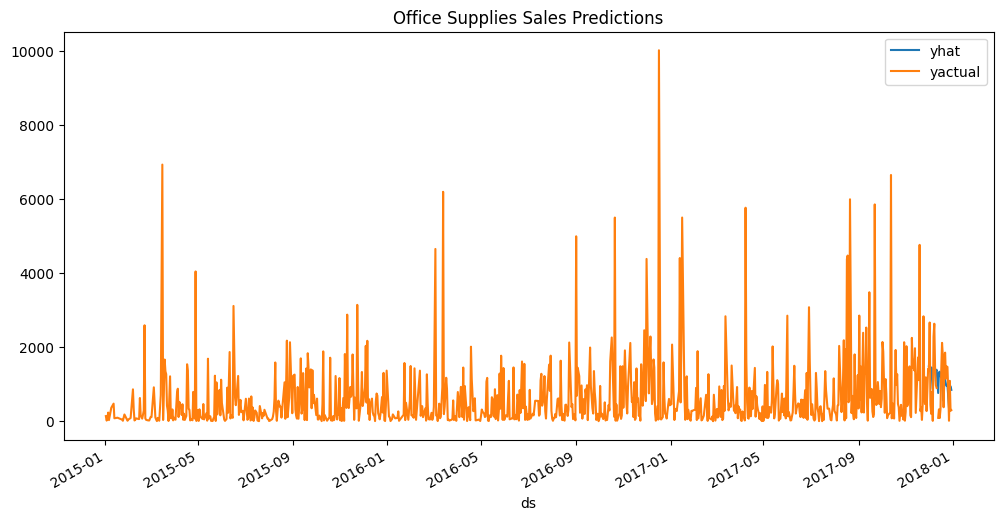

In [24]:
merged_df.plot(x= 'ds', y= ['yhat','yactual'], figsize=(12,6))
plt.title('Office Supplies Sales Predictions')
plt.xlabel ='Dates'
plt.ylabel = 'Sales'
plt.show()

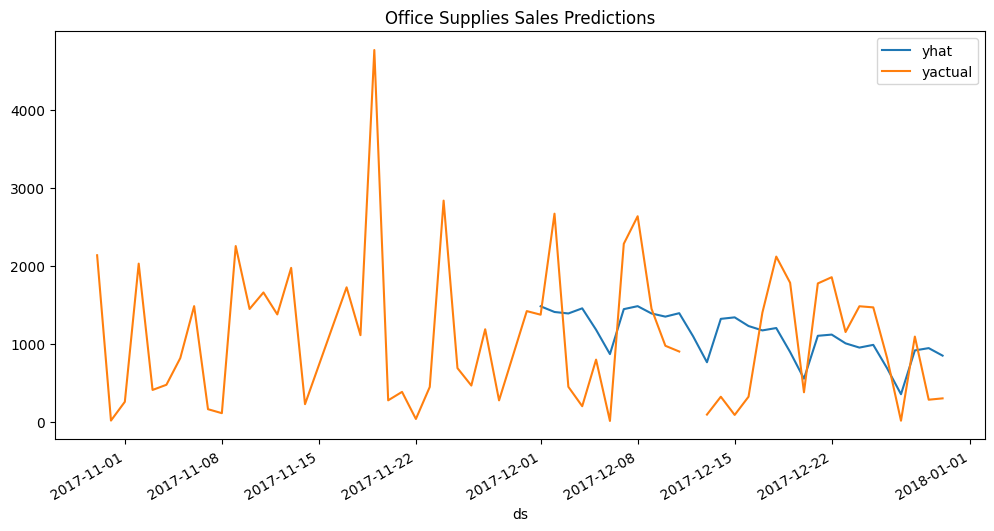

In [25]:
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

last_date = merged_df['ds'].max()
two_months_ago = last_date - pd.DateOffset(months=2)

merged_last2 = merged_df[merged_df['ds'] >= two_months_ago]

merged_last2.plot(x= 'ds', y= ['yhat','yactual'], figsize=(12,6))
plt.title('Office Supplies Sales Predictions')
plt.xlabel ='Dates'
plt.ylabel = 'Sales'
plt.show()




In [26]:
from sklearn.metrics import mean_absolute_percentage_error

mask = merged_df['yactual'].notna() & merged_df['yhat'].notna()
y_true = merged_df.loc[mask, 'yactual']
y_pred = merged_df.loc[mask, 'yhat']


mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape:.2f}%")

MAPE: 5.25%


In [42]:
import holidays

US_holidays = holidays.US(years=range(2015,2016,2017))


holiday_df = pd.DataFrame(list(US_holidays.items()), columns=['ds', 'holiday'])
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])

holiday_df['lower_window'] = -1
holiday_df['upper_window'] = 1

In [43]:
holiday_df.head(3)

,ds,holiday,lower_window,upper_window
0,2015-01-01,New Year's Day,-1,1
1,2015-05-25,Memorial Day,-1,1
2,2015-07-04,Independence Day,-1,1


In [44]:
m = Prophet(holidays= holiday_df)

m.fit(df_train)
future = m.make_future_dataframe(periods= 30, freq= 'D' )
prediction_h = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnibaxsia/czmz3jqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnibaxsia/u_ros4e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49441', 'data', 'file=/tmp/tmpnibaxsia/czmz3jqu.json', 'init=/tmp/tmpnibaxsia/u_ros4e9.json', 'output', 'file=/tmp/tmpnibaxsia/prophet_model0y9hqgq8/prophet_model-20250924194803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
pred2 = prediction_h[prediction_h['ds'] >= dt_end]

In [46]:
dfpredictions_h = pred2[['ds','yhat']]
dfpredictions_h.head(2)

,ds,yhat
846,2017-12-01,1533.108366
847,2017-12-02,1456.357104


In [47]:
dfpredictions_h.shape

(30, 2)

In [48]:
dfactual_h = actual_df.rename(columns= {'y' : 'yactual'})

In [49]:
merged_df2 = pd.merge(dfpredictions_h, dfactual_h, on='ds', how='outer')

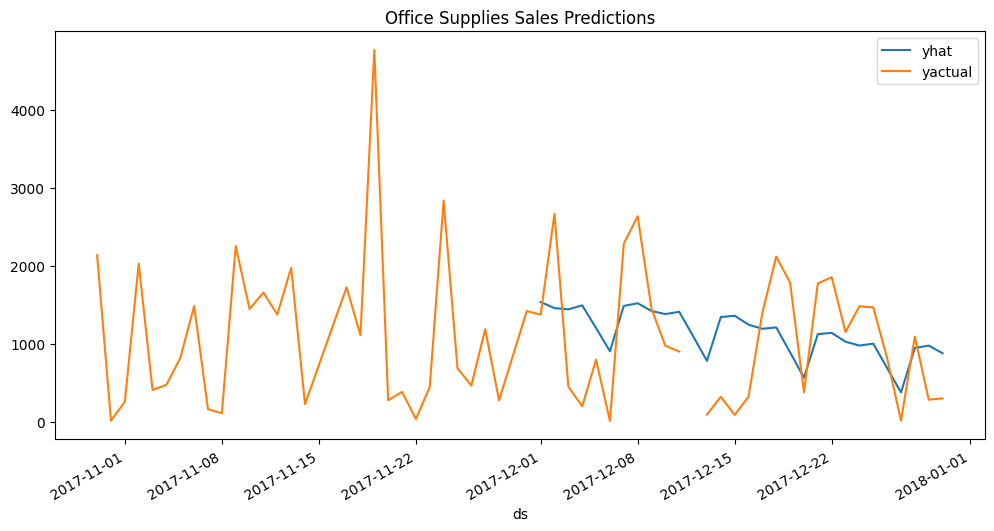

In [50]:
merged_df2['ds'] = pd.to_datetime(merged_df2['ds'])

last_date = merged_df2['ds'].max()
two_months_ago = last_date - pd.DateOffset(months=2)

merged_last2_h = merged_df2[merged_df2['ds'] >= two_months_ago]

merged_last2_h.plot(x= 'ds', y= ['yhat','yactual'], figsize=(12,6))
plt.title('Office Supplies Sales Predictions')
plt.xlabel ='Dates'
plt.ylabel = 'Sales'
plt.show()

In [51]:

mask = merged_df2['yactual'].notna() & merged_df2['yhat'].notna()
y_true = merged_df2.loc[mask, 'yactual']
y_pred = merged_df2.loc[mask, 'yhat']


mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape:.2f}%")

MAPE: 5.46%
